In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt


In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(398, 30)

In [5]:
X_train

array([[-0.12348985, -0.29680142, -0.17050713, ..., -0.84082156,
        -0.8563616 , -0.76574773],
       [-0.22826757, -0.65795149, -0.25377521, ..., -0.37706655,
        -1.3415819 , -0.41480748],
       [ 0.14553402, -1.23056444,  0.24583328, ..., -0.04762652,
        -0.08997059,  0.4882635 ],
       ...,
       [ 0.03226081, -0.55578404, -0.08064356, ..., -1.26179013,
        -0.6828391 , -1.27672587],
       [-0.05552593,  0.10949242, -0.04684166, ...,  1.07924018,
         0.4755842 ,  1.25530227],
       [-0.56525537,  0.32333128, -0.619825  , ..., -0.61952313,
        -0.30366032, -0.84348042]])

In [3]:
# Instantiate the KNN classifier with a specified number of neighbors (e.g., 3)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Predict the labels for the test set using KNN
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of the KNN classifier:", accuracy_knn)

# Calculate the probabilities for each class for the test set using KNN
y_probs_knn = knn.predict_proba(X_test)

# Compute ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn[:, 1])
auc_knn = auc(fpr_knn, tpr_knn)



Accuracy of the KNN classifier: 0.9590643274853801


In [4]:
y_probs_knn

array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8,

In [55]:
# Decision Tree classifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=20,min_samples_leaf=4,random_state=42)

# Train the Decision Tree classifier
dt.fit(X_train, y_train)

# Predict the labels for the test set using Decision Tree
y_pred_dt = dt.predict(X_test)

# Calculate the accuracy of the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of the Decision Tree classifier:", accuracy_dt)

# Calculate the probabilities for each class for the test set using Decision Tree
y_probs_dt = dt.predict_proba(X_test)

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt[:, 1])
auc_dt = auc(fpr_dt, tpr_dt)


Accuracy of the Decision Tree classifier: 0.9649122807017544


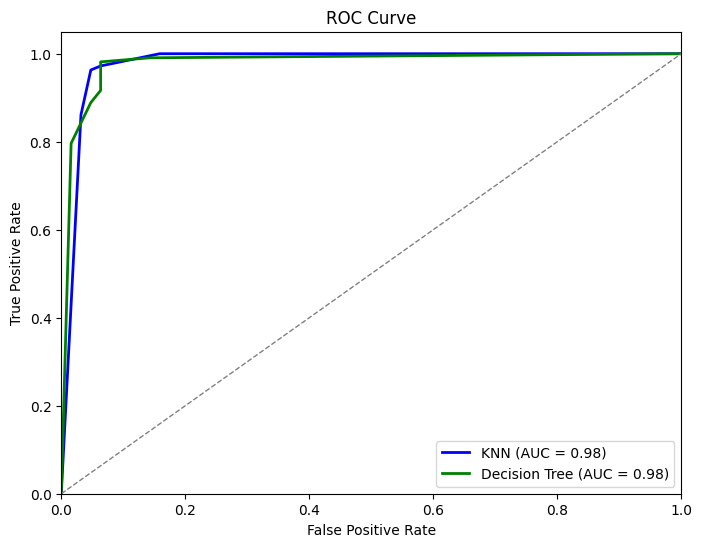

In [58]:
# Plot ROC curves for KNN and Decision Tree on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.2f)' % auc_knn)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()